# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

![Alt text](<Снимок экрана 2023-10-26 в 00.26.31.png>)

`### ваше решение тут ###`

Градиент функции потерь для MSE равен:

$-\frac{2}{\ell} (y - Xw)^{T} X $

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

Ник в контесте: Елисей Ш.

id посылки

* **VanillaGradientDescent**: 95353953


* **StochasticDescent**: 95355668


* **MomentumDescent**: 95356055


* **Adam**: 95356776


* **LinearRegression**: 95352515

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
categorical = ['notRepairedDamage', 'fuelType', 'gearbox', 'vehicleType', 'model', 'brand']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [10]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

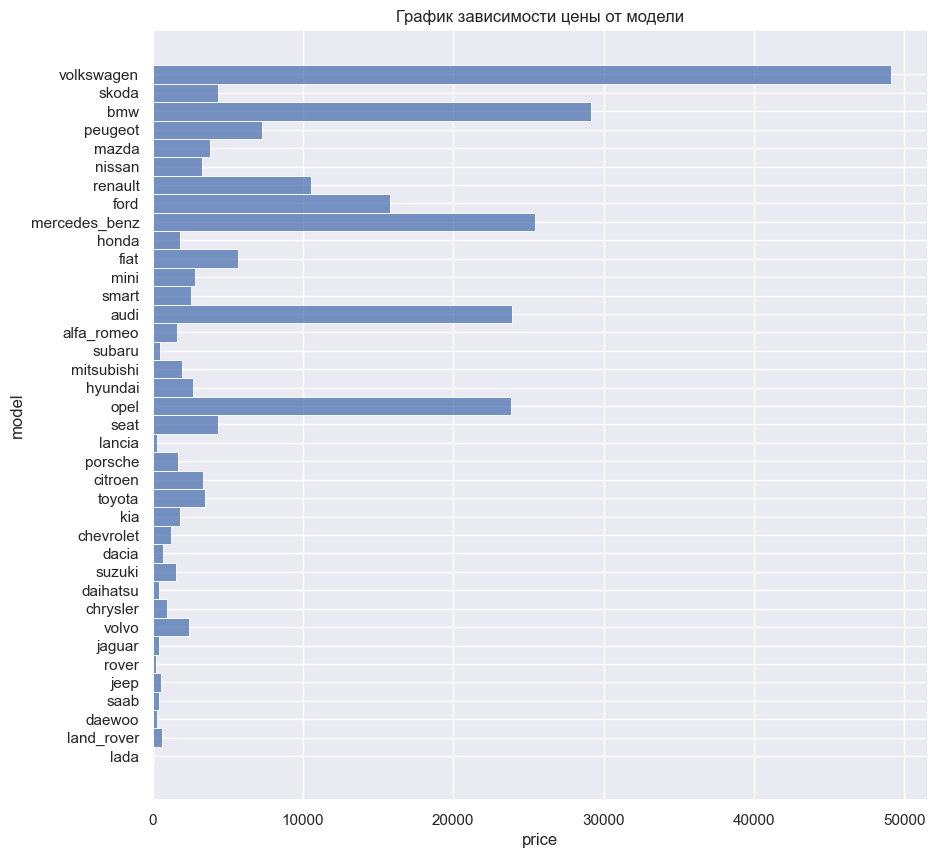

In [11]:
# sns.relplot(data=data, y='brand', x='price')

# plt.title("График зависимости цены от бренда")
# plt.ylabel('price')
# plt.xlabel('brand')

# plt.show()

# ax = sns.relplot(data=data, y='model', x='price')
ax = sns.histplot(y=data['brand'])
ax.figure.set_size_inches(10, 10)
plt.title("График зависимости цены от модели")
plt.xlabel('price')
plt.ylabel('model')

plt.show()


# plt.rcParams['figure.figsize'] = 6, 6

# # sns.countplot(x='price', y='brand', data=data)

# plt.title("График количества поездок в каждый из дней")
# plt.ylabel('brand')
# plt.xlabel('price')

# # plt.yticks(rotation=90)
# plt.show()

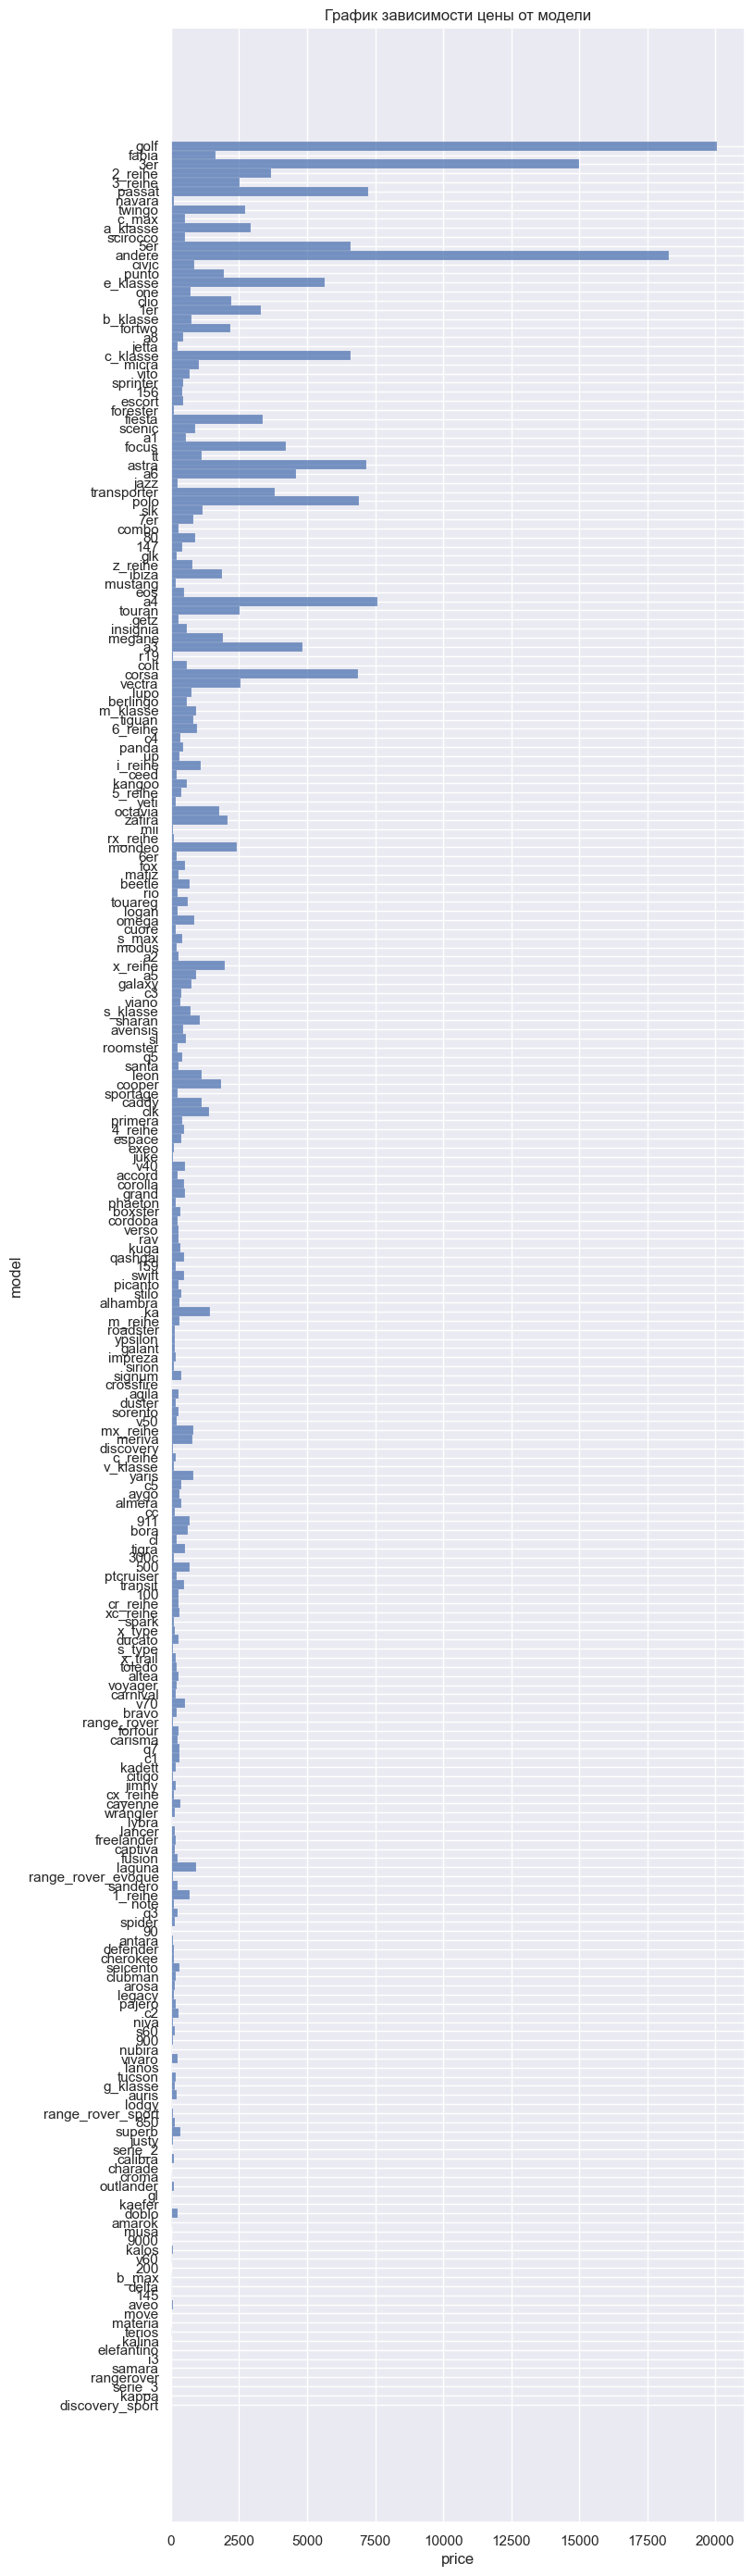

In [12]:
# ax = sns.relplot(data=data, y='model', x='price')
ax = sns.histplot(y=data['model'])
ax.figure.set_size_inches(8, 35)
plt.title("График зависимости цены от модели")
plt.xlabel('price')
plt.ylabel('model')

plt.show()

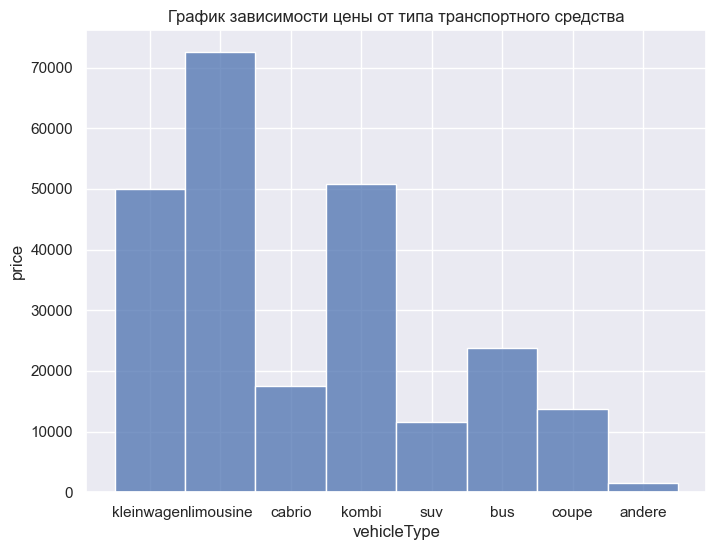

In [13]:
# sns.relplot(data=data, x='vehicleType', y='price', kind='line')
ax = sns.histplot(data['vehicleType'])

ax.figure.set_size_inches(8, 6)
plt.title("График зависимости цены от типа транспортного средства")
plt.ylabel('price')
plt.xlabel('vehicleType')

plt.show()

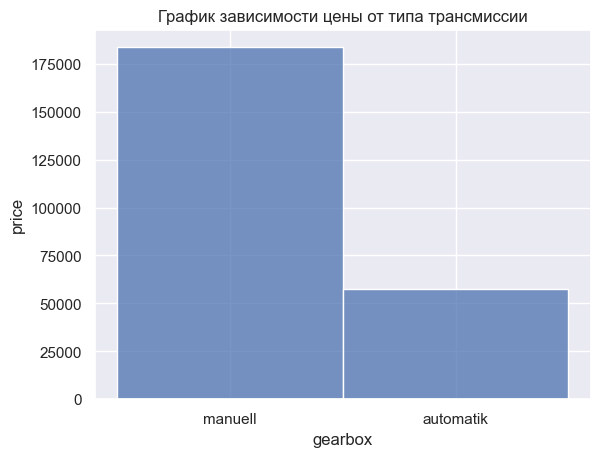

In [14]:
# sns.relplot(data=data, x='gearbox', y='price', kind='line')
sns.histplot(data['gearbox'])
plt.title("График зависимости цены от типа трансмиссии")
plt.ylabel('price')
plt.xlabel('gearbox')

plt.show()

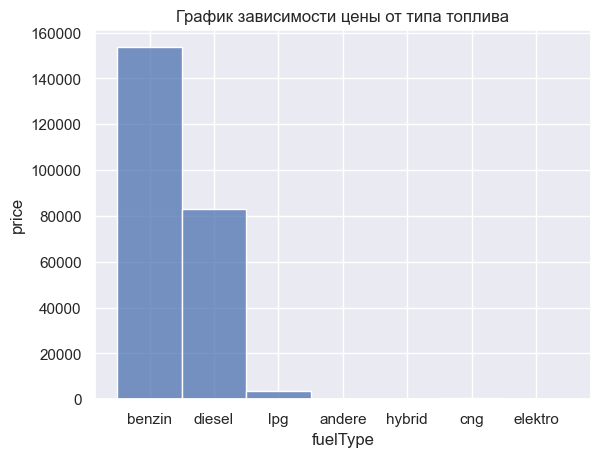

In [15]:
# sns.relplot(data=data, x='fuelType', y='price', kind='line')
sns.histplot(data['fuelType'])
plt.title("График зависимости цены от типа топлива")
plt.ylabel('price')
plt.xlabel('fuelType')

plt.show()

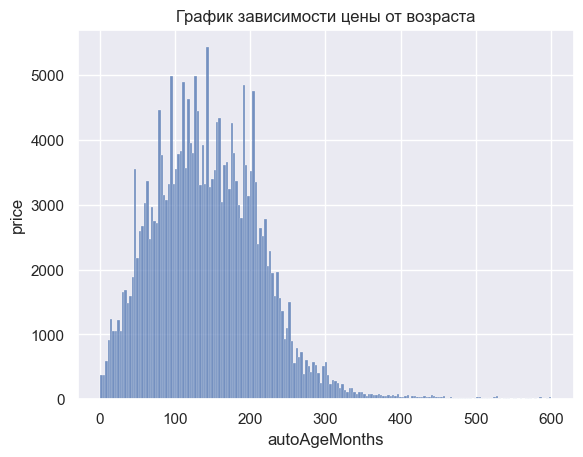

In [16]:
# sns.relplot(data=data, x='autoAgeMonths', y='price', kind='line')
sns.histplot(data['autoAgeMonths'])
plt.title("График зависимости цены от возраста")
plt.ylabel('price')
plt.xlabel('autoAgeMonths')

plt.show()

Избавляемся от выбросов

<Axes: title={'center': 'autoAgeMonths distribution'}, xlabel='autoAgeMonths', ylabel='price'>

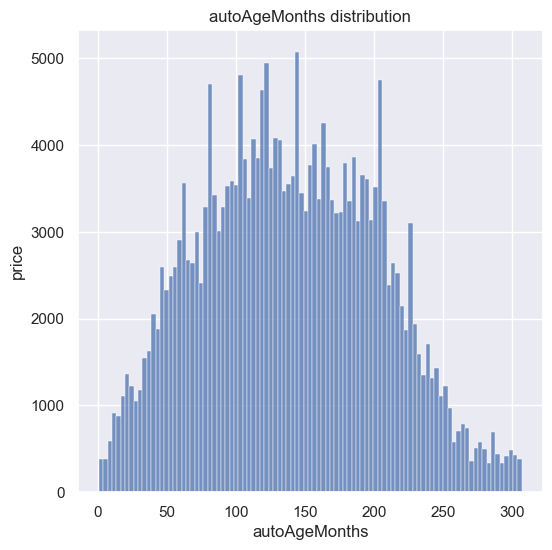

In [17]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# sns.relplot(data=data, x='autoAgeMonths', y='price', kind='line')
# sns.histplot(data['autoAgeMonths'])
# plt.title("График зависимости цены от возраста")
# plt.ylabel('price')
# plt.xlabel('autoAgeMonths')

plt.show()

boolean_value = data['autoAgeMonths'].to_numpy() <= np.percentile(data['autoAgeMonths'].to_numpy(), 98)

fig, ax = plt.subplots(figsize=(6, 6))

plt.title('autoAgeMonths distribution')
plt.xlabel('autoAgeMonths')
plt.ylabel('price')
# fig = plt.hist(train_sample[boolean_value]['autoAgeMonths'], histtype='bar', bins=100, range=(0, 55))
sns.histplot(data[boolean_value]['autoAgeMonths'])

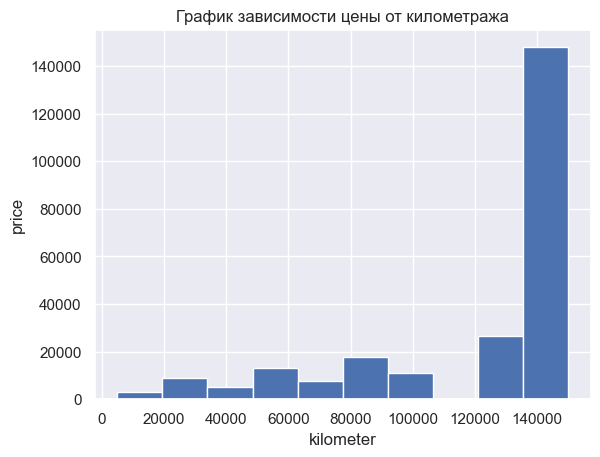

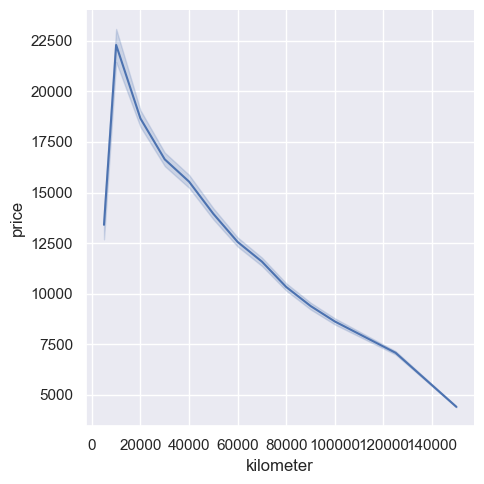

In [18]:
# sns.relplot(data=data, x='kilometer', y='price', kind='line')
plt.hist(data['kilometer'])
plt.title("График зависимости цены от километража")
plt.ylabel('price')
plt.xlabel('kilometer')

plt.show()

sns.relplot(data=data, x='kilometer', y='price', kind='line')

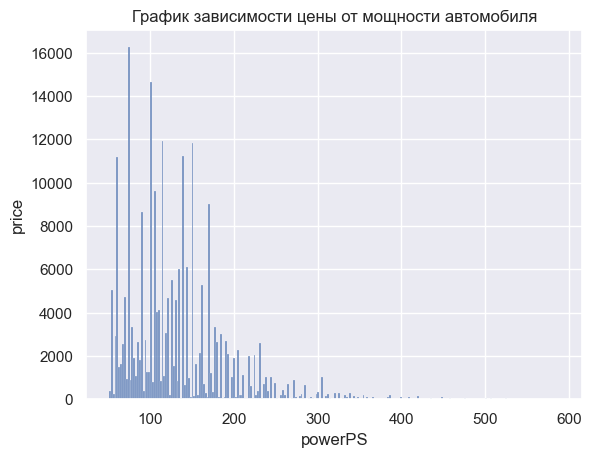

In [19]:
# sns.relplot(data=data, x='powerPS', y='price', kind='line')
sns.histplot(data['powerPS'])
plt.title("График зависимости цены от мощности автомобиля")
plt.ylabel('price')
plt.xlabel('powerPS')

plt.show()

<Axes: title={'center': 'powerPS distribution'}, xlabel='powerPS', ylabel='price'>

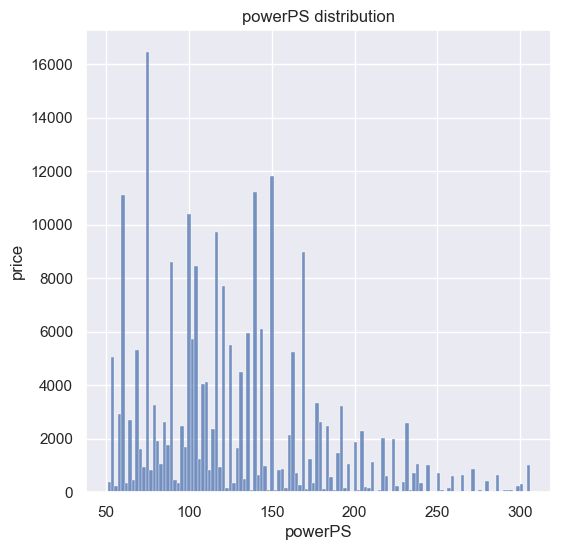

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# sns.relplot(data=data, x='autoAgeMonths', y='price', kind='line')
# sns.histplot(data['autoAgeMonths'])
# plt.title("График зависимости цены от возраста")
# plt.ylabel('price')
# plt.xlabel('autoAgeMonths')

plt.show()

boolean_value = data['powerPS'].to_numpy() <= np.percentile(data['powerPS'].to_numpy(), 98)

fig, ax = plt.subplots(figsize=(6, 6))

plt.title('powerPS distribution')
plt.xlabel('powerPS')
plt.ylabel('price')
# fig = plt.hist(train_sample[boolean_value]['autoAgeMonths'], histtype='bar', bins=100, range=(0, 55))
sns.histplot(data[boolean_value]['powerPS'])

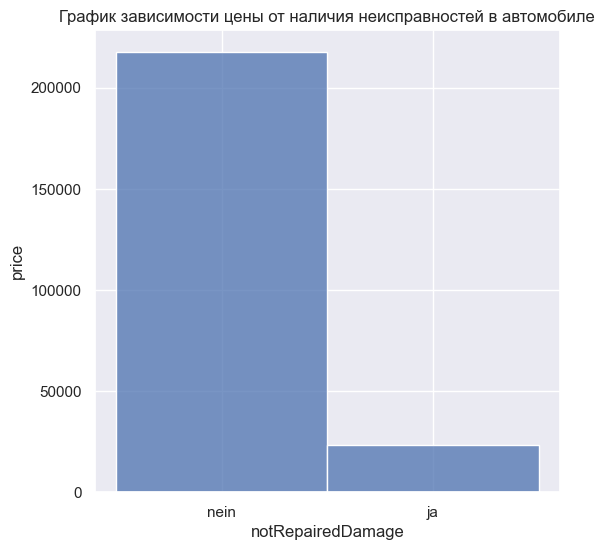

In [21]:
ax = sns.histplot(data['notRepairedDamage'])

ax.figure.set_size_inches(6, 6)

plt.title("График зависимости цены от наличия неисправностей в автомобиле")
plt.ylabel('price')
plt.xlabel('notRepairedDamage')

plt.show()

In [22]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

data['price_log'] = np.log1p(data['price'])

data_tmp = data.copy()

y = data_tmp['price_log']

data_tmp.drop(['price_log'], axis=1, inplace=True)
data_tmp.drop(['price'], axis=1, inplace=True)
data_tmp.drop(['model'], axis=1, inplace=True)
categorical.remove('model')

X_train, X_test, y_train, y_test = train_test_split(data_tmp, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [23]:
for cat in categorical:
    print("train {}".format(cat), len(np.unique(X_train[cat])), len(X_train[cat]))
    print("val {}".format(cat), len(np.unique(X_val[cat])), len(X_val[cat]))
    print("test {}".format(cat), len(np.unique(X_test[cat])), len(X_test[cat]))

train notRepairedDamage 2 192952
val notRepairedDamage 2 24119
test notRepairedDamage 2 24119
train fuelType 7 192952
val fuelType 7 24119
test fuelType 7 24119
train gearbox 2 192952
val gearbox 2 24119
test gearbox 2 24119
train vehicleType 8 192952
val vehicleType 8 24119
test vehicleType 8 24119
train brand 38 192952
val brand 38 24119
test brand 38 24119


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_val_transformed = column_transformer.transform(X_val)
X_test_transformed = column_transformer.transform(X_test)
print(X_val_transformed.shape, y_val.shape)
print(X_train_transformed.shape, y_train.shape)
print(X_test_transformed.shape, y_test.shape)

(24119, 61) (24119,)
(192952, 61) (192952,)
(24119, 61) (24119,)


Также очень уместно будет в качестве таргета взять логарифм от цены. Невероятно большие разбросы в результатах могут плохо влиять на оценку

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [25]:
from sklearn.metrics import r2_score

In [26]:
lambdas = np.logspace(-3, 0.5, 12)
# best_lambda_ = 
best_lambda_for_descent = {}
lambdas_for_descent = {}
iterations_r2_for_descent = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    losses = []
    lambdas_for_descent[descent_name] = []
    for cur_lambda in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train_transformed.shape[1],
                'lambda_': cur_lambda
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )
        regression.descent.lr.lambda_ = cur_lambda

        # print(X_val_transformed.shape, y_val.shape)
        # print(X_train_transformed.shape, y_train.shape)

        regression = regression.fit(X_train_transformed, y_train.values)
        loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
        loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
        loss = regression.calc_loss(X_val_transformed, y_val.values)
        losses.append(loss)
        lambdas_for_descent[descent_name].append((loss, cur_lambda))
        iterations_r2_for_descent[descent_name] = (len(regression.loss_history), loss_r2_train, loss_r2_test)
        print(loss, cur_lambda)
    best_lambda_for_descent[descent_name] = lambdas[np.argmin(losses)]
    # best_lambda_for_descent.append((descent_name, lambdas[np.argmin(losses)]))

26.162547766999563 0.001


22.13456225810778 0.0020805675382171715
17.264018351951368 0.004328761281083057
8.000307269166571 0.009006280202112787
2.0965713161789115 0.01873817422860384
0.9732583660632498 0.038986037025490715
0.6410045459504 0.08111308307896872
0.6018194030255641 0.1687612475788147
0.45808553172499605 0.3511191734215131
0.41515012856193423 0.7305271542664457
0.38410240928445855 1.5199110829529332
1.5620893333421006e+41 3.1622776601683795
25.596302874021184 0.001
27.3100240827849 0.0020805675382171715
18.86996136788952 0.004328761281083057
7.618867096072405 0.009006280202112787
3.061851589991191 0.01873817422860384
1.3405142592255017 0.038986037025490715
0.7896477547399545 0.08111308307896872
0.5568343837458621 0.1687612475788147
0.42642811772173045 0.3511191734215131
0.47174210040795667 0.7305271542664457
40134586256.80628 1.5199110829529332
8.346005982031349e+66 3.1622776601683795
5.167386566039361 0.001
1.3703457360856657 0.0020805675382171715
0.7850727405043901 0.004328761281083057
0.884146729

In [27]:
print(best_lambda_for_descent)
print(lambdas_for_descent)

print(iterations_r2_for_descent)

{'full': 1.5199110829529332, 'stochastic': 0.3511191734215131, 'momentum': 0.7305271542664457, 'adam': 3.1622776601683795}
{'full': [(26.162547766999563, 0.001), (22.13456225810778, 0.0020805675382171715), (17.264018351951368, 0.004328761281083057), (8.000307269166571, 0.009006280202112787), (2.0965713161789115, 0.01873817422860384), (0.9732583660632498, 0.038986037025490715), (0.6410045459504, 0.08111308307896872), (0.6018194030255641, 0.1687612475788147), (0.45808553172499605, 0.3511191734215131), (0.41515012856193423, 0.7305271542664457), (0.38410240928445855, 1.5199110829529332), (1.5620893333421006e+41, 3.1622776601683795)], 'stochastic': [(25.596302874021184, 0.001), (27.3100240827849, 0.0020805675382171715), (18.86996136788952, 0.004328761281083057), (7.618867096072405, 0.009006280202112787), (3.061851589991191, 0.01873817422860384), (1.3405142592255017, 0.038986037025490715), (0.7896477547399545, 0.08111308307896872), (0.5568343837458621, 0.1687612475788147), (0.426428117721730

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [28]:
loss_history_for_descent = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    loss_history_for_descent[descent_name] = []
    cur_lambda = best_lambda_for_descent[descent_name]
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train_transformed.shape[1],
            'lambda_': cur_lambda
        }
    }
    regression = LinearRegression(
        descent_config=descent_config,
    )
    regression.descent.lr.lambda_ = cur_lambda
    # print(X_val_transformed.shape, y_val.shape)
    # print(X_train_transformed.shape, y_train.shape)
    regression = regression.fit(X_train_transformed, y_train.values)
    loss = regression.calc_loss(X_train_transformed, y_train.values)
    loss_history_for_descent[descent_name] = regression.loss_history
    print(descent_name, loss_history_for_descent[descent_name])
    # plt.plot(loss_history_for_descent[descent_name], label = descent_name)
    # best_lambda_for_descent.append((descent_name, lambdas[np.argmin(losses)]))
# plt.figure(figsize=(12, 6))
# plt.legend()
# plt.ylabel('loss')
# plt.xlabel('iteration')
# plt.title('descents distribution')
# plt.show()

full [26.673605685009317, 874.0581492668381, 20139.20307540128, 331694.3463528273, 4129182.9075442767, 40560293.218097255, 324271448.28849316, 2158997156.292293, 12183710866.543398, 59093905932.46668, 249141789791.55865, 921605793402.096, 3014688783124.1, 8778783106428.814, 22888196213351.79, 53695360117686.15, 113841943290050.47, 218965397962077.7, 383383905194239.5, 612905342577837.0, 897079903443828.2, 1205046150146727.5, 1488889681526183.2, 1695378062202502.2, 1782348938742613.0, 1732785905855697.2, 1560132341198075.5, 1302631615929567.8, 1009836731939509.4, 727657515925866.5, 487844508676988.6, 304582868714227.75, 177236122970663.3, 96192109440090.23, 48724997416324.39, 23048526143106.113, 10186807349676.5, 4208561506754.3306, 1625925862283.0327, 587604405827.8141, 198704782795.38898, 62888194356.823364, 18631317648.064285, 5167564818.86427, 1341927799.627478, 326276054.89123684, 74275468.61791003, 15829987.524941942, 3158211.2472664593, 589735.6734978319, 103048.03296902882, 1684

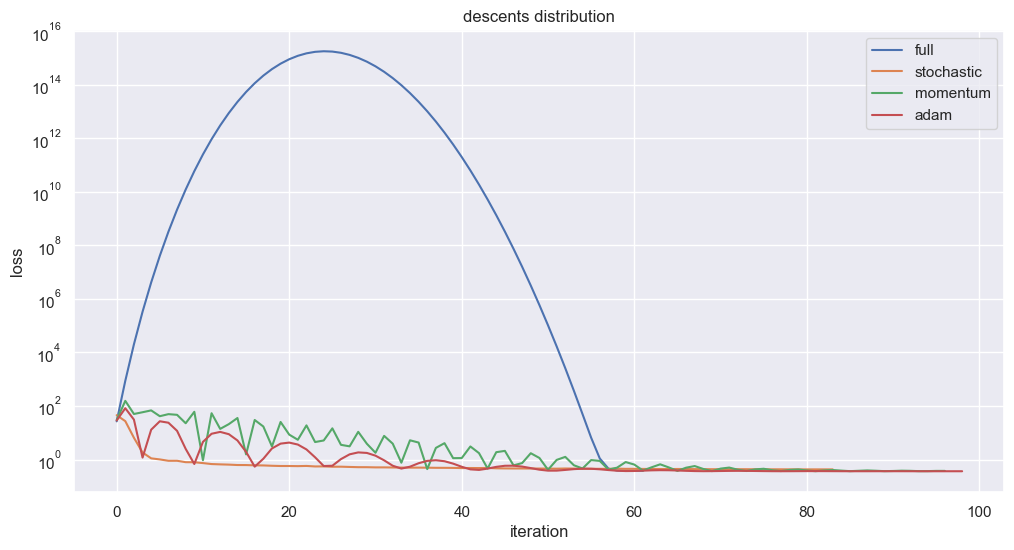

In [29]:
# YOUR CODE:

plt.figure(figsize=(12, 6))



for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    plt.plot(loss_history_for_descent[descent_name], label = descent_name)

plt.legend()
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('descents distribution')
plt.show()

`### ваше решение тут ###`
Адам гораздо быстрее сходится, фулл имеет большую дисперсию, а у моментума большая волатильность

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [30]:
import time

In [31]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:


k = 10

mean_regr_time = {}
mean_regr_it = {}
mean_regr_it_arr = []
mean_regr_time_arr = []
for batch_size in batch_sizes:
    regr_time = []
    regr_it = []
    for i in range(0, k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train_transformed.shape[1],
                'batch_size': batch_size,
                'lambda_': best_lambda_for_descent['stochastic']
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )

        regression.descent.lr.lambda_ = best_lambda_for_descent['stochastic']
        # print(X_val_transformed.shape, y_val.shape)
        # print(X_train_transformed.shape, y_train.shape)
        t = time.time()
        regression = regression.fit(X_train_transformed, y_train.values)
        regr_time.append(time.time() - t)
        loss = regression.calc_loss(X_train_transformed, y_train.values)
        regr_it.append(len(regression.loss_history))
    mean_regr_time[batch_size] = np.mean(regr_time)
    mean_regr_it[batch_size] = np.mean(regr_it)
    mean_regr_time_arr.append((batch_size, np.mean(regr_time)))
    mean_regr_it_arr.append((batch_size, np.mean(regr_it)))

[Text(0.5, 0, 'batch_size'),
 Text(0, 0.5, 'time'),
 Text(0.5, 1.0, 'stochastic mean time')]

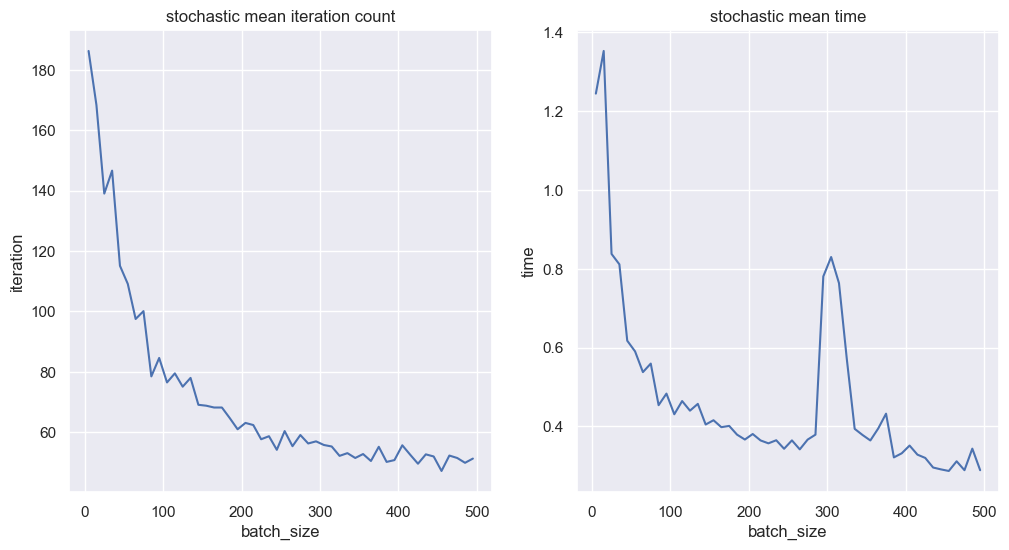

In [32]:
# YOUR CODE:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.lineplot(ax=axes[0], x=np.array(mean_regr_it_arr)[:, 0], y=np.array(mean_regr_it_arr)[:, 1])
sns.lineplot(ax=axes[1], x=np.array(mean_regr_time_arr)[:, 0], y=np.array(mean_regr_time_arr)[:, 1])


axes[0].set(xlabel='batch_size', ylabel='iteration', title='stochastic mean iteration count')

axes[1].set(xlabel='batch_size', ylabel='time', title='stochastic mean time')


`### ваше решение тут ###`
Чем меньше размер батча, тем больше итераций и времени нужно для сходимости

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: 95357174 - id посылки


Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [33]:
# YOUR CODE:
mus = np.logspace(-4, 0, 8)
best_mu_for_descent = {}
best_loss_for_descent = {}
loss_history_for_descent_mu = {}
mus_for_descent = {}
iterations_r2_for_descent_mus = {}
best_loss = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_loss[descent_name] = 1e12
    for cur_lambda in lambdas:
        for mu in mus:
            losses = []
            mus_for_descent[descent_name] = []
            descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': X_train_transformed.shape[1],
                    'lambda_': cur_lambda,
                    'mu': mu,
                },
                'regularized': True
            }
            regression = LinearRegression(
                descent_config=descent_config,
            )

            regression.descent.mu = mu
            regression.descent.lr.lambda_ = cur_lambda
            regression.descent.regularized = True

            regression = regression.fit(X_train_transformed, y_train.values)
            
            loss = regression.calc_loss(X_val_transformed, y_val.values)
            losses.append(loss)
            if loss < best_loss[descent_name]:
                best_loss[descent_name] = loss
                best_mu_for_descent[descent_name] = (cur_lambda, mu)
    

In [34]:
# YOUR CODE:
best_loss_for_descent = {}
loss_history_for_descent_mu = {}
mus_for_descent = {}
iterations_r2_for_descent_mus = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    cur_lambda, mu = best_mu_for_descent[descent_name]
    losses = []
    mus_for_descent[descent_name] = []
    best_loss_for_descent[descent_name] = 1e9
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {
            'dimension': X_train_transformed.shape[1],
            'lambda_': cur_lambda,
            'mu': mu,
        },
        'regularized': True
    }
    regression = LinearRegression(
        descent_config=descent_config,
    )
    regression.descent.mu = mu
    regression.descent.lr.lambda_ = cur_lambda
    regression.descent.regularized = True
    regression = regression.fit(X_train_transformed, y_train.values)
    
    loss = regression.calc_loss(X_val_transformed, y_val.values)
    
    loss_history_for_descent_mu[descent_name] = regression.loss_history

    loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
    loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))

    best_loss_for_descent[descent_name] = loss
    losses.append(loss)

    mus_for_descent[descent_name].append((loss, cur_lambda))

    iterations_r2_for_descent_mus[descent_name] = (len(regression.loss_history), loss_r2_train, loss_r2_test)
    print(descent_name, loss, mu, cur_lambda)

    

full 0.3937311773297649 0.019306977288832496 1.5199110829529332
stochastic 0.3979290717495429 0.0003727593720314938 0.7305271542664457
momentum 0.36371975358936853 0.0013894954943731374 1.5199110829529332
adam 0.3704840787531748 0.0001 1.5199110829529332


In [35]:
print(best_mu_for_descent)
print(mus_for_descent)

print(iterations_r2_for_descent_mus)
print(iterations_r2_for_descent)

{'full': (1.5199110829529332, 0.019306977288832496), 'stochastic': (0.7305271542664457, 0.0003727593720314938), 'momentum': (1.5199110829529332, 0.0013894954943731374), 'adam': (1.5199110829529332, 0.0001)}
{'full': [(0.3937311773297649, 1.5199110829529332)], 'stochastic': [(0.3979290717495429, 0.7305271542664457)], 'momentum': [(0.36371975358936853, 1.5199110829529332)], 'adam': [(0.3704840787531748, 1.5199110829529332)]}
{'full': (254, 0.7030537228969358, 0.708965280902078), 'stochastic': (301, 0.7000541951403402, 0.7062232873918506), 'momentum': (157, 0.7250342508905026, 0.7323609836666388), 'adam': (70, 0.7200321984645343, 0.7280158419402161)}
{'full': (301, -1.2352619752926728e+41, -1.322918657705066e+41), 'stochastic': (301, -6.3493388923610214e+66, -6.4969677583436785e+66), 'momentum': (301, -1.6550817029435873e+18, -1.7081708881376484e+18), 'adam': (91, 0.7248015089421544, 0.7315857989715707)}


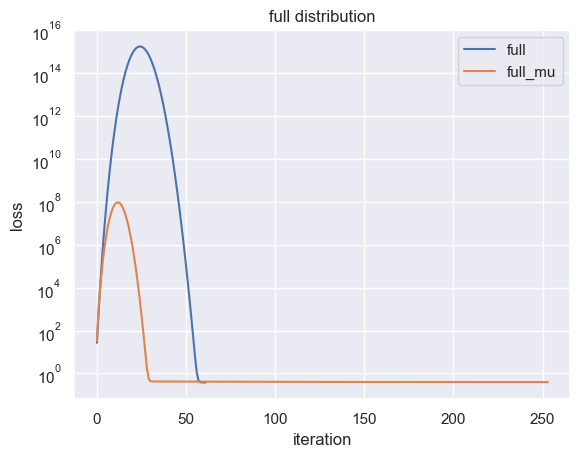

In [36]:

plt.plot(loss_history_for_descent['full'], label='full')
plt.plot(loss_history_for_descent_mu['full'], label='full_mu')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('full distribution')
plt.legend()
plt.show()

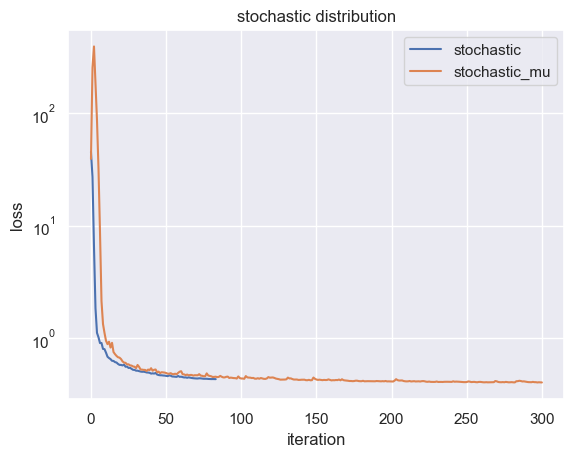

In [37]:

plt.plot(loss_history_for_descent['stochastic'], label='stochastic')
plt.plot(loss_history_for_descent_mu['stochastic'], label='stochastic_mu')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('stochastic distribution')
plt.legend()
plt.show()

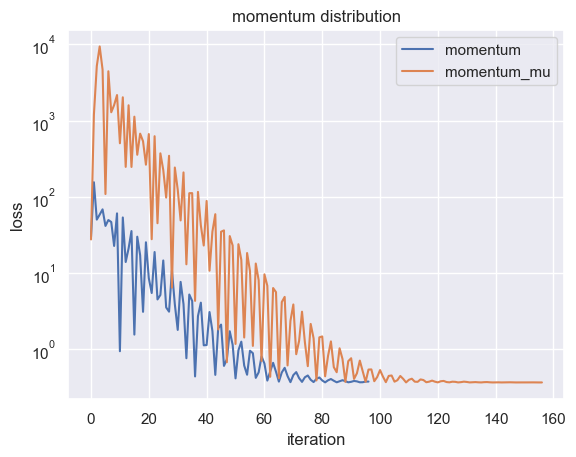

In [38]:

plt.plot(loss_history_for_descent['momentum'], label='momentum')
plt.plot(loss_history_for_descent_mu['momentum'], label='momentum_mu')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('momentum distribution')
plt.legend()
plt.show()

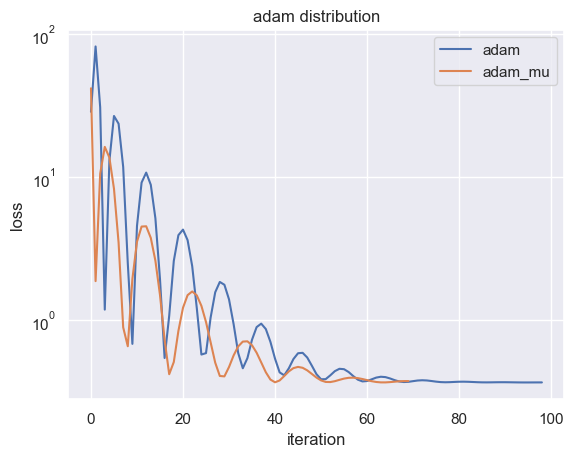

In [39]:

plt.plot(loss_history_for_descent['adam'], label='adam')
plt.plot(loss_history_for_descent_mu['adam'], label='adam_mu')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('adam distribution')
plt.legend()
plt.show()

`### ваше решение тут ###`

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Есть определенные методы оптимизации, на которых с регуляризацией мы быстрее добиваемся сходимости

качество стало сильно лучше, наш р2 стремится теперь к 1


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

$L(x, w, y)'_w = (log(cosh(xw - y)))'_w = \frac{1}{cosh(xw - y)} \cdot sinh(xw - y) \cdot x = tanh(xw - y) \cdot x \Longrightarrow$

$Q(w)'_w = \frac{1}{\ell} \sum \limits_{i = 1}^{\ell} tanh(x_iw - y) \cdot x_i = \frac{1}{\ell} x^{T}tanh(xw-y)$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [42]:
from descents import LossFunction
lambdas = np.logspace(-3, 0.5, 12)

# best_lambda_ = 
best_lambda_for_descent_log_cosh = {}
lambdas_for_descent_log_cosh = {}
loss_history_for_descent_log_cosh = {}
iterations_r2_for_descent_cosh = {}

In [43]:
loss_log_cosh = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    losses = []
    lambdas_for_descent_log_cosh[descent_name] = []
    loss_log_cosh[descent_name] = 1e9
    for cur_lambda in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train_transformed.shape[1],
                'lambda_': cur_lambda,
                'loss_function': LossFunction.LogCosh
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )
        regression.descent.lr.lambda_ = cur_lambda
        regression.descent.loss_function = LossFunction.LogCosh
        regression = regression.fit(X_train_transformed, y_train.values)
        # loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
        # loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
        loss = regression.calc_loss(X_val_transformed, y_val.values)
        if loss < loss_log_cosh[descent_name]:
            loss_log_cosh[descent_name] = loss
            losses.append(loss)
            lambdas_for_descent_log_cosh[descent_name].append((loss, cur_lambda))
            loss_history_for_descent_log_cosh[descent_name] = regression.loss_history
            loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
            loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
            iterations_r2_for_descent_cosh[descent_name] = (len(regression.loss_history), loss_r2_train, loss_r2_test)
            print(loss, cur_lambda)
    best_lambda_for_descent_log_cosh[descent_name] = lambdas[np.argmin(losses)]
    # best_lambda_for_descent.append((descent_name, lambdas[np.argmin(losses)]))

5.821393369788309 0.001
3.6818485738071502 0.0020805675382171715
3.057324451078796 0.038986037025490715
1.1744928342875167 0.08111308307896872
0.3432129626796056 0.1687612475788147
0.25505571067811816 0.3511191734215131
0.1844204070134975 0.7305271542664457
0.15030433693761625 1.5199110829529332
0.14039213342043128 3.1622776601683795
4.552195085322532 0.001
4.003877208011217 0.0020805675382171715
3.756458772085983 0.004328761281083057
1.4215772385131722 0.08111308307896872
0.3325101164111607 0.1687612475788147
0.2693605903870572 0.3511191734215131
0.1717427577712016 0.7305271542664457
0.13973401012643422 1.5199110829529332
0.129130627173876 3.1622776601683795
4.294066914696066 0.001
1.0699798308739727 0.009006280202112787
0.341008484392057 0.01873817422860384
0.2463648333971091 0.038986037025490715
0.1840290686574179 0.08111308307896872
0.14931413353462059 0.1687612475788147
0.13454262118974417 0.3511191734215131
0.13104261214154514 0.7305271542664457
0.12782001270535748 1.519911082952

In [44]:
print(best_lambda_for_descent_log_cosh)
print(lambdas_for_descent_log_cosh)

print(iterations_r2_for_descent_cosh)


{'full': 0.3511191734215131, 'stochastic': 0.3511191734215131, 'momentum': 0.7305271542664457, 'adam': 0.7305271542664457}
{'full': [(5.821393369788309, 0.001), (3.6818485738071502, 0.0020805675382171715), (3.057324451078796, 0.038986037025490715), (1.1744928342875167, 0.08111308307896872), (0.3432129626796056, 0.1687612475788147), (0.25505571067811816, 0.3511191734215131), (0.1844204070134975, 0.7305271542664457), (0.15030433693761625, 1.5199110829529332), (0.14039213342043128, 3.1622776601683795)], 'stochastic': [(4.552195085322532, 0.001), (4.003877208011217, 0.0020805675382171715), (3.756458772085983, 0.004328761281083057), (1.4215772385131722, 0.08111308307896872), (0.3325101164111607, 0.1687612475788147), (0.2693605903870572, 0.3511191734215131), (0.1717427577712016, 0.7305271542664457), (0.13973401012643422, 1.5199110829529332), (0.129130627173876, 3.1622776601683795)], 'momentum': [(4.294066914696066, 0.001), (1.0699798308739727, 0.009006280202112787), (0.341008484392057, 0.018

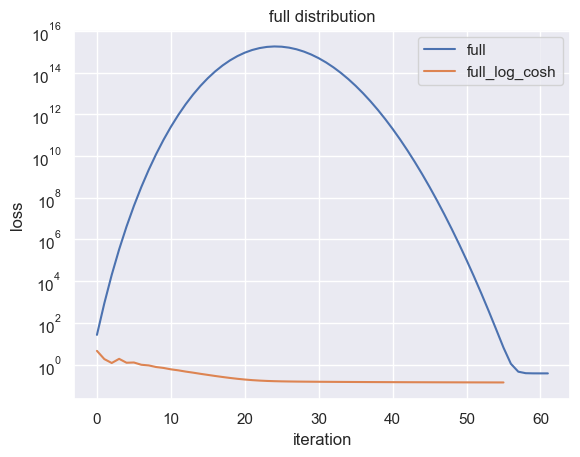

In [45]:

plt.plot(loss_history_for_descent['full'], label='full')
plt.plot(loss_history_for_descent_log_cosh['full'], label='full_log_cosh')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('full distribution')
plt.legend()
plt.show()

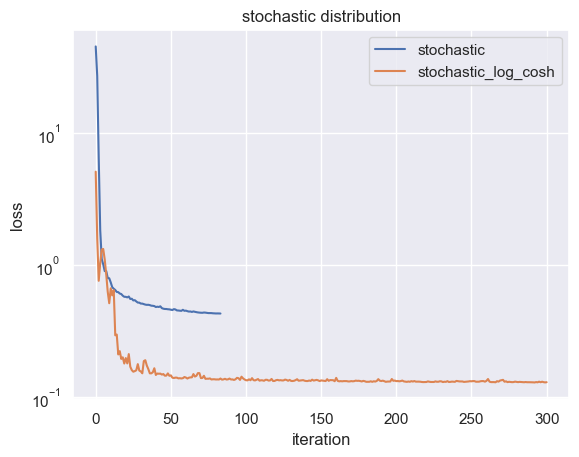

In [46]:

plt.plot(loss_history_for_descent['stochastic'], label='stochastic')
plt.plot(loss_history_for_descent_log_cosh['stochastic'], label='stochastic_log_cosh')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('stochastic distribution')
plt.legend()
plt.show()

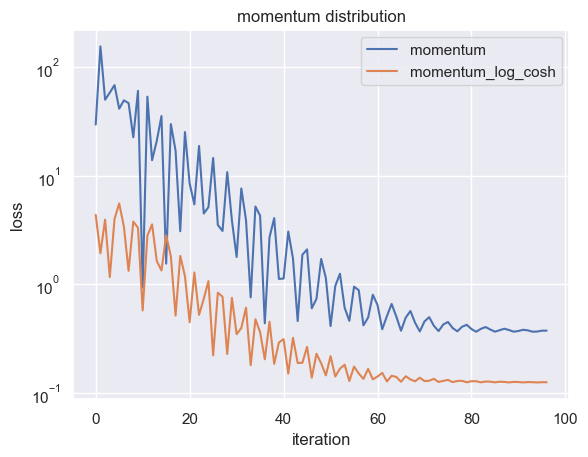

In [47]:

plt.plot(loss_history_for_descent['momentum'], label='momentum')
plt.plot(loss_history_for_descent_log_cosh['momentum'], label='momentum_log_cosh')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('momentum distribution')
plt.legend()
plt.show()

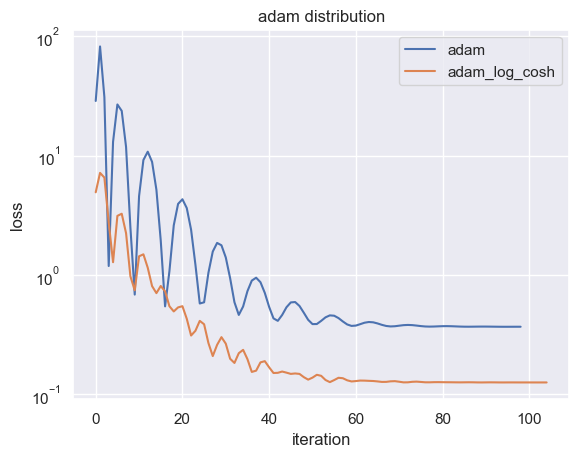

In [48]:

plt.plot(loss_history_for_descent['adam'], label='adam')
plt.plot(loss_history_for_descent_log_cosh['adam'], label='adam_log_cosh')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('adam distribution')
plt.legend()
plt.show()

In [61]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    cosh_iteration, cosh_r2_tr, cosh_r2_test = iterations_r2_for_descent_cosh[descent_name]
    iteration, r2_tr, r2_test = iterations_r2_for_descent[descent_name]
    print(cosh_r2_tr - r2_tr, cosh_r2_test - r2_test)

1.2352619752926728e+41 1.322918657705066e+41
6.3493388923610214e+66 6.4969677583436785e+66
1.6550817029435873e+18 1.7081708881376484e+18
-0.006418520132767336 -0.007958827331970064


Если сравнивать программу с тем, что было в номере 5, то все, кроме Адама предсказывает ошибку лучше

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

![Alt text](%D1%83_%D0%BA%D0%B0%D0%BC%D0%B8%D0%BD%D0%B0.jpg)

![Alt text](%D0%B4%D0%BE%D0%B2%D0%BE%D0%BB%D1%8C%D0%BD%D1%8B%D0%B8%CC%86_%D0%AD%D0%BD%D0%B4%D1%80%D1%8E.jpg)

![Alt text](%D1%81%D1%82%D0%BE%D0%BB_%D1%81_%D1%88%D0%B0%D1%88%D0%BB%D1%8B%D0%BA%D0%BE%D0%BC.jpg)

`### ваш кулинарный опыт тут ###`

Мы с друзьями, а именно: Андрей Грузицкий, Дмитрий Гриценко и я - Шинкарев Елисей, увидев это задание, решили сгонять загород и приготовить свиной шашлык по следующему рецепту:


1. Купить маринованный шашлык

2. Найти шампура

3. Оставить шашлык на мангале до состояния готовности, периодически переворачивая


Впечатления невероятные, очень крутые посиделки у костра, холодные руки и надвигающиеся сопли. Шашлык местами суховат, местами не доделан, однако главное, что мы вместе. А еще спасибо маме за маринованные помидоры. Каждый принимал участие в процессе, однако фотка есть только довольного Эндрю Грузицкого

P.s. На фотке я делаю практику, а Эндрю - дл

Мы без сна делали МО, параллельно смотря НБА, почти доделали, однако Эндрю выбрал сон, а мы, в 6 утра, почувствовав голод, решили перейти на это задание, сделав омлет. Я люблю готовить примерно по такому рецепту:

Все нарезается мелко-мелко

1. 5 яиц перемешиваются с луком, если есть еще какая-то зелень (петрушка, шпинат) - добавляем

2. На сковородку бросаются лук, карбонад/колбаска, а в идеале еще и грибы. 

3. Забрасываем помидор/перец, я люблю оба в примерно одинаковом количестве

4. Равномерно размешиваем содерживаю сковородки

5. Равномерно заливаем смесь зелени и яиц в сковородку

6. Накрываем крышкой, ставим на средний огонь, ждем-с

7. Когда понимаем, что блюдо готово, посыпаем сыром, выключаем плиту, накрываем крышкой. Ждем минуты 1,5 и Все

У нас много чего не было, да и Димасик большими кусками нарезает, но это мой идеальный омлет, а я пошел доделывать мо.

![Alt text](<2023-10-27 16.42.11.jpg>)

![Alt text](<2023-10-27 17.13.50.jpg>)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

Реализация Nadam

https://paperswithcode.com/method/nadam

In [49]:
lambdas = np.logspace(-3, 0.5, 12)

# best_lambda_ = 
best_lambda_for_descent_nadam = {}
lambdas_for_descent_nadam = {}
loss_history_for_descent_nadam = {}

In [50]:
# YOUR CODE:
for descent_name in ['nadam']:
    losses = []
    lambdas_for_descent_nadam[descent_name] = []
    for cur_lambda in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train_transformed.shape[1],
                'lambda_': cur_lambda,
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )
        regression.descent.lr.lambda_ = cur_lambda
        regression = regression.fit(X_train_transformed, y_train.values)
        # loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
        # loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
        loss = regression.calc_loss(X_val_transformed, y_val.values)
        losses.append(loss)
        lambdas_for_descent_nadam[descent_name].append((loss, cur_lambda))
        loss_history_for_descent_nadam[descent_name] = regression.loss_history
        print(loss, cur_lambda)
    best_lambda_for_descent_nadam[descent_name] = lambdas[np.argmin(losses)]
    # best_lambda_for_descent.append((descent_name, lambdas[np.argmin(losses)]))

28.081419419076806 0.001
26.976195894399623 0.0020805675382171715
22.097998616396396 0.004328761281083057
33.942945877707906 0.009006280202112787
11.051307876810593 0.01873817422860384
1.6675356449424472 0.038986037025490715
0.6702452664347545 0.08111308307896872
0.38006778085884807 0.1687612475788147
0.3628353292741557 0.3511191734215131
0.3618589402589661 0.7305271542664457
0.361582292644664 1.5199110829529332
0.36155944728273764 3.1622776601683795


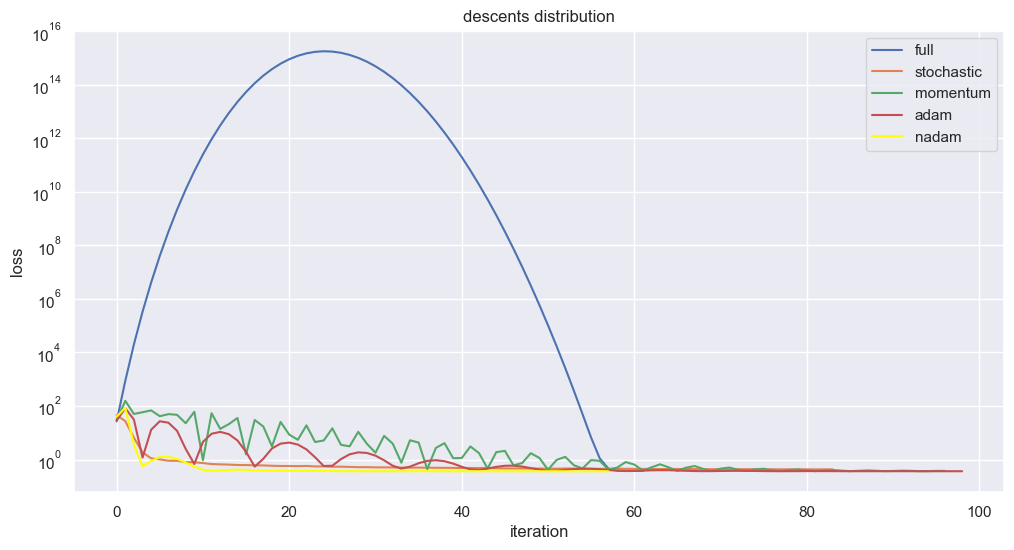

In [51]:
# YOUR CODE:

plt.figure(figsize=(12, 6))

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    plt.plot(loss_history_for_descent[descent_name], label = descent_name)

for descent_name in ['nadam']:
    plt.plot(loss_history_for_descent_nadam[descent_name], label = descent_name, color='yellow')

plt.legend()
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('descents distribution')
plt.show()

Надам выглядит хорошо, даже лучше адама и быстрее сходится. менее волатилен на большом количестве итераций

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

МАЕ:

$L(x, w, y)'_w = (|xw - y|)'_w = sign(xw - y) \cdot x \Longrightarrow$

$Q(w)'_w = \frac{1}{\ell} \sum \limits_{i = 1}^{\ell} sign(x_iw - y) \cdot x_i = \frac{1}{\ell} x^{T}sign(xw-y)$


Huber:

$L(x, w, y)'_w = (\frac{1}{2} \cdot (xw - y)^2 \cdot \mathbb{I}_{|xw - y| \le \delta} + \delta \cdot (|xw - y| - \frac{1}{2} \delta) \cdot \mathbb{I}_{|xw - y| > \delta})'_w$

$Q(w)'_w = \frac{1}{\ell} \sum \limits_{i = 1}^{\ell} (x_iw - y)x_i \cdot \mathbb{I}_{|x_iw - y| \le \delta} + \delta sign(x_iw-y)x_i \cdot \mathbb{I}_{|x_iw - y| > \delta} = \frac{1}{\ell} (x^{T} (xw - y) \cdot \mathbb{I}_{|xw - y| \le \delta} + \delta x^{T} sign(xw-y) \cdot \mathbb{I}_{|xw - y| > \delta})$



Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [54]:
lambdas = np.logspace(-3, 0.5, 12)

# best_lambda_ = 
best_lambda_for_descent_mae = {}
lambdas_for_descent_mae = {}
loss_history_for_descent_mae = {}
iterations_r2_for_descent_mae = {}

In [55]:
# YOUR CODE:
min_loss = {}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    losses = []
    lambdas_for_descent_mae[descent_name] = []
    min_loss[descent_name] = 1e9
    for cur_lambda in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train_transformed.shape[1],
                'lambda_': cur_lambda,
                'loss_function': LossFunction.MAE
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )
        regression.descent.lr.lambda_ = cur_lambda
        regression.descent.loss_function = LossFunction.MAE
        regression = regression.fit(X_train_transformed, y_train.values)
        # loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
        # loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
        loss = regression.calc_loss(X_val_transformed, y_val.values)
        losses.append(loss)
        if loss < min_loss[descent_name]:
            min_loss[descent_name] = loss
            loss_history_for_descent_mae[descent_name] = regression.loss_history
            lambdas_for_descent_mae[descent_name].append((loss, cur_lambda))
            loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
            loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
            iterations_r2_for_descent_mae[descent_name] = (len(regression.loss_history), loss_r2_train, loss_r2_test)
        
            print(loss, cur_lambda)
    best_lambda_for_descent_mae[descent_name] = lambdas[np.argmin(losses)]
    # best_lambda_for_descent.append((descent_name, lambdas[np.argmin(losses)]))

5.299103038167087 0.001
4.893528919332381 0.0020805675382171715
4.033935320772915 0.004328761281083057
1.7825971755103955 0.08111308307896872
0.8350136653987578 0.1687612475788147
0.5783556522123006 0.3511191734215131
0.44839416353994743 0.7305271542664457
0.399688286954463 1.5199110829529332
0.37504219245335213 3.1622776601683795
6.15371802534413 0.001
5.090826666990123 0.0020805675382171715
4.652745635204286 0.009006280202112787
4.49444961534527 0.01873817422860384
3.2738978736846733 0.038986037025490715
1.69415804329701 0.08111308307896872
0.9593278418279795 0.1687612475788147
0.4726917427519505 0.3511191734215131
0.3902254864218865 0.7305271542664457
0.38072936893148956 1.5199110829529332
5.293189926785689 0.001
4.957278217562552 0.0020805675382171715
1.6505484489860576 0.009006280202112787
0.8009281255857666 0.01873817422860384
0.5094460196494938 0.038986037025490715
0.43284526504064924 0.08111308307896872
0.3948849017487761 0.1687612475788147
0.38582387959186676 0.351119173421513

In [63]:
lambdas = np.logspace(-3, 0.5, 12)
# best_lambda_ = 
best_lambda_for_descent_huber = {}
lambdas_for_descent_huber = {}
loss_history_for_descent_huber = {}
iterations_r2_for_descent_huber = {}

In [64]:
# YOUR CODE:

min_loss = {}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    losses = []
    min_loss[descent_name] = 1e9

    lambdas_for_descent_huber[descent_name] = []
    for cur_lambda in lambdas:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_train_transformed.shape[1],
                'lambda_': cur_lambda,
                'loss_function': LossFunction.Huber
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
        )
        regression.descent.lr.lambda_ = cur_lambda
        regression.descent.loss_function = LossFunction.Huber
        regression = regression.fit(X_train_transformed, y_train.values)
        # loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
        # loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
        loss = regression.calc_loss(X_val_transformed, y_val.values)
        if loss < min_loss[descent_name]:
            min_loss[descent_name] = loss
            losses.append(loss)
            lambdas_for_descent_huber[descent_name].append((loss, cur_lambda))
            loss_history_for_descent_huber[descent_name] = regression.loss_history
            loss_r2_train = r2_score(y_train, regression.predict(X_train_transformed))
            loss_r2_test = r2_score(y_test, regression.predict(X_test_transformed))
            iterations_r2_for_descent_huber[descent_name] = (len(regression.loss_history), loss_r2_train, loss_r2_test)
            print(loss, cur_lambda)
    best_lambda_for_descent_huber[descent_name] = lambdas[np.argmin(losses)]
    # best_lambda_for_descent.append((descent_name, lambdas[np.argmin(losses)]))

38.0002455475745 0.001
25.234343965023054 0.0020805675382171715
20.63246824100651 0.004328761281083057
5.652238319422598 0.009006280202112787
2.334287668015162 0.01873817422860384
1.1637714891693445 0.038986037025490715
0.7463830705806986 0.08111308307896872
0.5927140017430244 0.1687612475788147
0.47956966552727065 0.3511191734215131
0.40485212417971 0.7305271542664457
0.37970104499943647 1.5199110829529332
30.140748623001596 0.001
25.6629601911752 0.0020805675382171715
17.192238726362053 0.004328761281083057
7.7337426903661814 0.009006280202112787
2.2293182995815153 0.01873817422860384
1.324789475142473 0.038986037025490715
0.6398715846716618 0.08111308307896872
0.5302661520702782 0.1687612475788147
0.4374412647532372 0.3511191734215131
0.4262712134025223 0.7305271542664457
4.713557148522443 0.001
1.838544787452122 0.0020805675382171715
0.79854134780077 0.004328761281083057
0.752622129117722 0.009006280202112787
0.6337359575956966 0.01873817422860384
0.5034253877308851 0.0389860370254

In [65]:
print(iterations_r2_for_descent_huber)
print(iterations_r2_for_descent_mae)
print(iterations_r2_for_descent_mus)
print(iterations_r2_for_descent)

{'full': (62, 0.7133526750837488, 0.7197777030097492), 'stochastic': (301, 0.6790123753635477, 0.6852659425428942), 'momentum': (97, 0.7200396974346979, 0.7267123219047055), 'adam': (91, 0.724924255410893, 0.7317671243439335)}
{'full': (208, 0.6879107338491813, 0.6918388960865489), 'stochastic': (301, 0.6961446861009464, 0.7004182314230138), 'momentum': (111, 0.6935800529364299, 0.6968037344071399), 'adam': (123, 0.6954975604654061, 0.6987347723367046)}
{'full': (254, 0.7030537228969358, 0.708965280902078), 'stochastic': (301, 0.7000541951403402, 0.7062232873918506), 'momentum': (157, 0.7250342508905026, 0.7323609836666388), 'adam': (70, 0.7200321984645343, 0.7280158419402161)}
{'full': (301, -1.2352619752926728e+41, -1.322918657705066e+41), 'stochastic': (301, -6.3493388923610214e+66, -6.4969677583436785e+66), 'momentum': (301, -1.6550817029435873e+18, -1.7081708881376484e+18), 'adam': (91, 0.7248015089421544, 0.7315857989715707)}


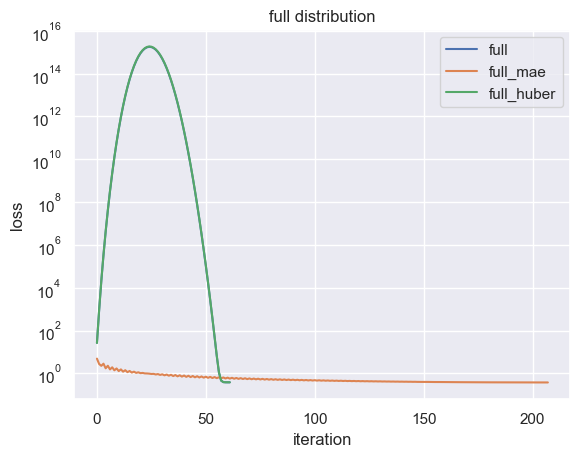

In [66]:
plt.plot(loss_history_for_descent['full'], label='full')
plt.plot(loss_history_for_descent_mae['full'], label='full_mae')
plt.plot(loss_history_for_descent_huber['full'], label='full_huber')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('full distribution')
plt.legend()
plt.show()

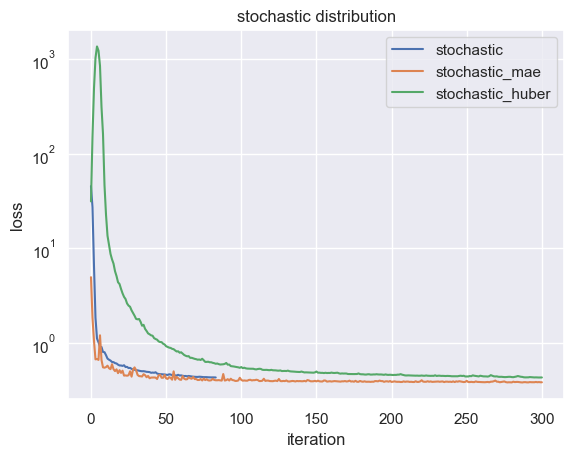

In [67]:
plt.plot(loss_history_for_descent['stochastic'], label='stochastic')
plt.plot(loss_history_for_descent_mae['stochastic'], label='stochastic_mae')
plt.plot(loss_history_for_descent_huber['stochastic'], label='stochastic_huber')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('stochastic distribution')
plt.legend()
plt.show()

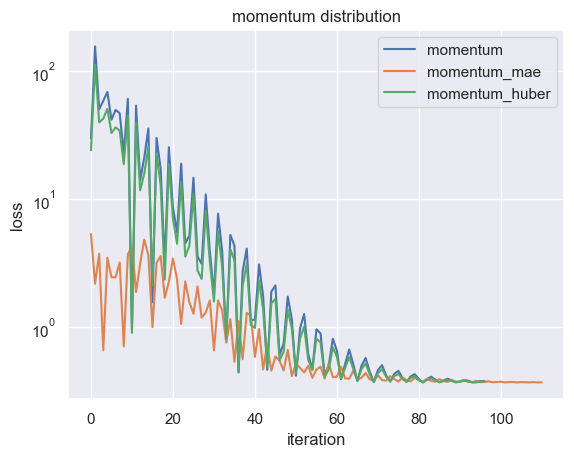

In [68]:
plt.plot(loss_history_for_descent['momentum'], label='momentum')
plt.plot(loss_history_for_descent_mae['momentum'], label='momentum_mae')
plt.plot(loss_history_for_descent_huber['momentum'], label='momentum_huber')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('momentum distribution')
plt.legend()
plt.show()

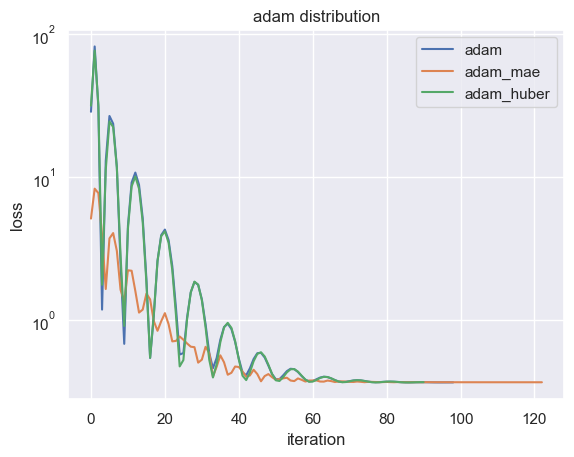

In [69]:
plt.plot(loss_history_for_descent['adam'], label='adam')
plt.plot(loss_history_for_descent_mae['adam'], label='adam_mae')
plt.plot(loss_history_for_descent_huber['adam'], label='adam_huber')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('iteration')
plt.title('adam distribution')
plt.legend()
plt.show()

# TODO: выводы

Как показывает метрика r2 в зависимости от алгоритма лучше использовать ту или иную метрику. Но в большинстве случаев значение р2 у Хубера выше, чем у мае